# 第 5 章第 2 节-波士顿房价预测问题

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.datasets import load_boston

boston = load_boston()
X = boston.data
y = boston.target

In [3]:
X.shape

(506, 13)

In [4]:
np.set_printoptions(threshold=1e6)

In [5]:
import pandas as pd

pd.DataFrame(X).mean(axis=0)

0       3.613524
1      11.363636
2      11.136779
3       0.069170
4       0.554695
5       6.284634
6      68.574901
7       3.795043
8       9.549407
9     408.237154
10     18.455534
11    356.674032
12     12.653063
dtype: float64

可以看到有的方差还是很大的，因此有必要做数据标准化。

In [6]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=666)

In [8]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(normalize=True)

model.fit(X_train, y_train)

train_score = model.score(X_train, y_train)
cv_score = model.score(X_test, y_test)
print('train_score: {0:0.6f}; cv_score: {1:.6f}'.format(train_score, cv_score))

train_score: 0.760805; cv_score: 0.633607


In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline


def polynomial_model(degree=1):
    polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)
    linear_regression = LinearRegression(normalize=True)
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    return pipeline

In [10]:
model = polynomial_model(degree=2)
model.fit(X_train, y_train)
train_score = model.score(X_train, y_train)
cv_score = model.score(X_test, y_test)

In [11]:
print('train_score: {0:0.6f}; cv_score: {1:.6f}'.format(train_score, cv_score))

train_score: 0.947049; cv_score: 0.761900


次数为 $2$ 的时候已经过拟合了。

<Figure size 3600x800 with 0 Axes>

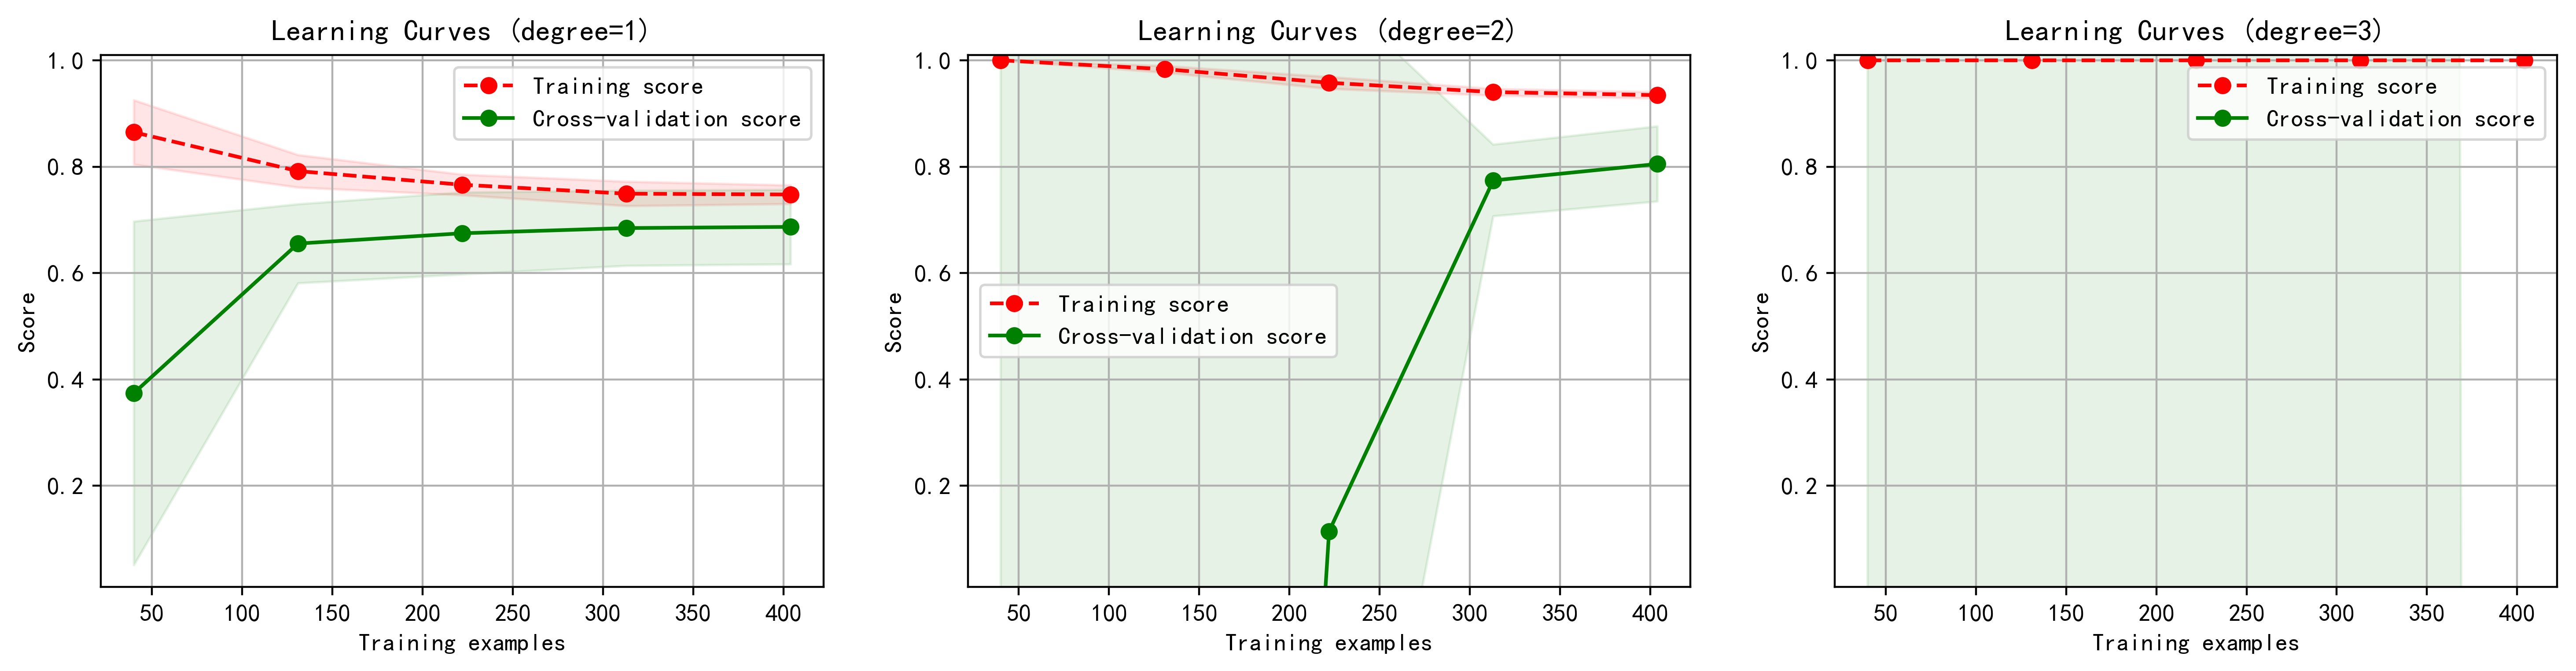

In [12]:
from common.utils import plot_learning_curve
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
plt.figure(figsize=(18, 4), dpi=200)
title = 'Learning Curves (degree={0})'
degrees = [1, 2, 3]

plt.figure(figsize=(18, 4), dpi=200)
for i in range(len(degrees)):
    plt.subplot(1, 3, i + 1)
    plot_learning_curve(
        plt,
        polynomial_model(degrees[i]),
        title.format(degrees[i]),
        X,
        y,
        ylim=(0.01, 1.01),
        cv=cv)

plt.show()

## 使用树模型

随机森林是一个常用的集成学习算法，从下面的尝试中，我们可以看到，在测试数据集上 $R^2$ 值已经达到了 $0.84$。

+ 树模型的一个优点是：不用对数据集进行标准化。

In [13]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=100, random_state=666)
rfr.fit(X_train, y_train)
rfr.score(X_test, y_test)

0.831876601134654